DATA AQUISITION GROUP PROJECT

GROUP MEMBERS


In [46]:
# import all libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import scipy.stats as stats
# from lifelines import KaplanMeierFitter


In [47]:
oral_cancer_df = pd.read_csv('oral_cancer_prediction_dataset.csv', )

oral_cancer_df.head()

,ID,Country,Age,Gender,Tobacco Use,Alcohol Consumption,HPV Infection,Betel Quid Use,Chronic Sun Exposure,Poor Oral Hygiene,...,Difficulty Swallowing,White or Red Patches in Mouth,Tumor Size (cm),Cancer Stage,Treatment Type,"Survival Rate (5-Year, %)",Cost of Treatment (USD),Economic Burden (Lost Workdays per Year),Early Diagnosis,Oral Cancer (Diagnosis)
0,1,Italy,36,Female,Yes,Yes,Yes,No,No,Yes,...,No,No,0.000000,0,No Treatment,100.000000,0.00,0,No,No
1,2,Japan,64,Male,Yes,Yes,Yes,No,Yes,Yes,...,No,No,1.782186,1,No Treatment,83.340103,77772.50,177,No,Yes
2,3,UK,37,Female,No,Yes,No,No,Yes,Yes,...,No,Yes,3.523895,2,Surgery,63.222871,101164.50,130,Yes,Yes
3,4,Sri Lanka,55,Male,Yes,Yes,No,Yes,No,Yes,...,No,No,0.000000,0,No Treatment,100.000000,0.00,0,Yes,No
4,5,South Africa,68,Male,No,No,No,No,No,Yes,...,No,No,2.834789,3,No Treatment,44.293199,45354.75,52,No,Yes


### 1. Data Cleaning

#### Data Overview

In [48]:
oral_cancer_df.shape

(84922, 25)

In [49]:
oral_cancer_df.describe()

,ID,Age,Tumor Size (cm),Cancer Stage,"Survival Rate (5-Year, %)",Cost of Treatment (USD),Economic Burden (Lost Workdays per Year)
count,84922.000000,84922.000000,84922.000000,84922.000000,84922.000000,84922.000000,84922.000000
mean,42461.500000,54.509444,1.747294,1.118756,79.503364,39109.881244,52.028391
std,24515.014117,10.014839,2.028199,1.340418,26.483746,44710.687054,60.389796
min,1.000000,15.000000,0.000000,0.000000,10.000750,0.000000,0.000000
25%,21231.250000,48.000000,0.000000,0.000000,65.233425,0.000000,0.000000
50%,42461.500000,55.000000,0.000000,0.000000,100.000000,0.000000,0.000000
75%,63691.750000,61.000000,3.480075,2.000000,100.000000,76468.437500,104.000000
max,84922.000000,101.000000,5.999899,4.000000,100.000000,159988.000000,179.000000


In [50]:
oral_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84922 entries, 0 to 84921
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   ID                                        84922 non-null  int64  
 1   Country                                   84922 non-null  object 
 2   Age                                       84922 non-null  int64  
 3   Gender                                    84922 non-null  object 
 4   Tobacco Use                               84922 non-null  object 
 5   Alcohol Consumption                       84922 non-null  object 
 6   HPV Infection                             84922 non-null  object 
 7   Betel Quid Use                            84922 non-null  object 
 8   Chronic Sun Exposure                      84922 non-null  object 
 9   Poor Oral Hygiene                         84922 non-null  object 
 10  Diet (Fruits & Vegetables Intake) 

In [51]:
oral_cancer_df.columns

Index(['ID', 'Country', 'Age', 'Gender', 'Tobacco Use', 'Alcohol Consumption',
       'HPV Infection', 'Betel Quid Use', 'Chronic Sun Exposure',
       'Poor Oral Hygiene', 'Diet (Fruits & Vegetables Intake)',
       'Family History of Cancer', 'Compromised Immune System', 'Oral Lesions',
       'Unexplained Bleeding', 'Difficulty Swallowing',
       'White or Red Patches in Mouth', 'Tumor Size (cm)', 'Cancer Stage',
       'Treatment Type', 'Survival Rate (5-Year, %)',
       'Cost of Treatment (USD)', 'Economic Burden (Lost Workdays per Year)',
       'Early Diagnosis', 'Oral Cancer (Diagnosis)'],
      dtype='object')

#### Check for missing values

In [52]:
oral_cancer_df.isnull().any()

ID                                          False
Country                                     False
Age                                         False
Gender                                      False
Tobacco Use                                 False
Alcohol Consumption                         False
HPV Infection                               False
Betel Quid Use                              False
Chronic Sun Exposure                        False
Poor Oral Hygiene                           False
Diet (Fruits & Vegetables Intake)           False
Family History of Cancer                    False
Compromised Immune System                   False
Oral Lesions                                False
Unexplained Bleeding                        False
Difficulty Swallowing                       False
White or Red Patches in Mouth               False
Tumor Size (cm)                             False
Cancer Stage                                False
Treatment Type                              False


In [53]:
oral_cancer_df.isnull().sum()

ID                                          0
Country                                     0
Age                                         0
Gender                                      0
Tobacco Use                                 0
Alcohol Consumption                         0
HPV Infection                               0
Betel Quid Use                              0
Chronic Sun Exposure                        0
Poor Oral Hygiene                           0
Diet (Fruits & Vegetables Intake)           0
Family History of Cancer                    0
Compromised Immune System                   0
Oral Lesions                                0
Unexplained Bleeding                        0
Difficulty Swallowing                       0
White or Red Patches in Mouth               0
Tumor Size (cm)                             0
Cancer Stage                                0
Treatment Type                              0
Survival Rate (5-Year, %)                   0
Cost of Treatment (USD)           

<Axes: >

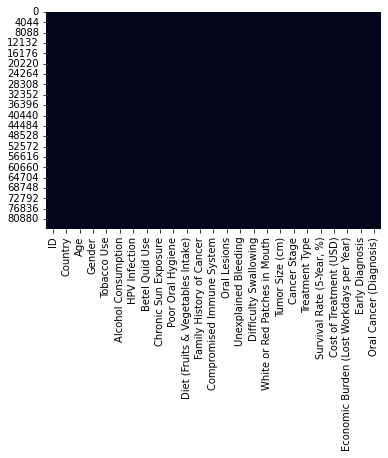

In [54]:
# use heatmap
sns.heatmap(oral_cancer_df.isnull(), cbar=False)

#### Check for duplicates

In [55]:
oral_cancer_df.duplicated().sum()

0

#### Check for Data types

In [56]:
oral_cancer_df.dtypes

ID                                            int64
Country                                      object
Age                                           int64
Gender                                       object
Tobacco Use                                  object
Alcohol Consumption                          object
HPV Infection                                object
Betel Quid Use                               object
Chronic Sun Exposure                         object
Poor Oral Hygiene                            object
Diet (Fruits & Vegetables Intake)            object
Family History of Cancer                     object
Compromised Immune System                    object
Oral Lesions                                 object
Unexplained Bleeding                         object
Difficulty Swallowing                        object
White or Red Patches in Mouth                object
Tumor Size (cm)                             float64
Cancer Stage                                  int64
Treatment Ty

#### Standardize Column names

- Column names to lowercase

In [57]:
oral_cancer_df.columns = oral_cancer_df.columns.str.strip().str.lower().str.replace(" ", "_")

oral_cancer_df.columns

Index(['id', 'country', 'age', 'gender', 'tobacco_use', 'alcohol_consumption',
       'hpv_infection', 'betel_quid_use', 'chronic_sun_exposure',
       'poor_oral_hygiene', 'diet_(fruits_&_vegetables_intake)',
       'family_history_of_cancer', 'compromised_immune_system', 'oral_lesions',
       'unexplained_bleeding', 'difficulty_swallowing',
       'white_or_red_patches_in_mouth', 'tumor_size_(cm)', 'cancer_stage',
       'treatment_type', 'survival_rate_(5-year,_%)',
       'cost_of_treatment_(usd)', 'economic_burden_(lost_workdays_per_year)',
       'early_diagnosis', 'oral_cancer_(diagnosis)'],
      dtype='object')

In [58]:
oral_cancer_df['gender'].unique

<bound method Series.unique of 0        Female
1          Male
2        Female
3          Male
4          Male
          ...  
84917      Male
84918      Male
84919      Male
84920      Male
84921      Male
Name: gender, Length: 84922, dtype: object>

- Convert float numbers correct to 3dp

In [59]:
oral_cancer_df.head(2)

,id,country,age,gender,tobacco_use,alcohol_consumption,hpv_infection,betel_quid_use,chronic_sun_exposure,poor_oral_hygiene,...,difficulty_swallowing,white_or_red_patches_in_mouth,tumor_size_(cm),cancer_stage,treatment_type,"survival_rate_(5-year,_%)",cost_of_treatment_(usd),economic_burden_(lost_workdays_per_year),early_diagnosis,oral_cancer_(diagnosis)
0,1,Italy,36,Female,Yes,Yes,Yes,No,No,Yes,...,No,No,0.000000,0,No Treatment,100.000000,0.0,0,No,No
1,2,Japan,64,Male,Yes,Yes,Yes,No,Yes,Yes,...,No,No,1.782186,1,No Treatment,83.340103,77772.5,177,No,Yes


In [60]:
round_col = [
    'tumor_size_(cm)',
    'survival_rate_(5-year,_%)'
    ]

oral_cancer_df[round_col] = oral_cancer_df[round_col].round(2)

oral_cancer_df.head(2)

,id,country,age,gender,tobacco_use,alcohol_consumption,hpv_infection,betel_quid_use,chronic_sun_exposure,poor_oral_hygiene,...,difficulty_swallowing,white_or_red_patches_in_mouth,tumor_size_(cm),cancer_stage,treatment_type,"survival_rate_(5-year,_%)",cost_of_treatment_(usd),economic_burden_(lost_workdays_per_year),early_diagnosis,oral_cancer_(diagnosis)
0,1,Italy,36,Female,Yes,Yes,Yes,No,No,Yes,...,No,No,0.00,0,No Treatment,100.00,0.0,0,No,No
1,2,Japan,64,Male,Yes,Yes,Yes,No,Yes,Yes,...,No,No,1.78,1,No Treatment,83.34,77772.5,177,No,Yes


#### Handle Outliers

In [61]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]




In [62]:
Q1 = oral_cancer_df['age'].quantile(0.25)
Q3 = oral_cancer_df['age'].quantile(0.75)

IQR = Q3 - Q1


print("Q1", Q1)
print("Q3", Q3)
print("IQR", IQR)


Q1 48.0
Q3 61.0
IQR 13.0


In [63]:
print(oral_cancer_df['age'].min())
print(oral_cancer_df['age'].max())

15
101


In [64]:
# Example usage
outliers = detect_outliers_iqr(oral_cancer_df, 'age')
print(outliers)

          id    country  age  gender tobacco_use alcohol_consumption  \
201      202      India   28    Male         Yes                  No   
408      409  Sri Lanka   28    Male         Yes                 Yes   
470      471      Kenya   26  Female         Yes                  No   
566      567     Russia   28    Male         Yes                  No   
776      777     Taiwan   82    Male          No                 Yes   
...      ...        ...  ...     ...         ...                 ...   
84287  84288  Sri Lanka   83    Male         Yes                 Yes   
84433  84434        USA   88  Female         Yes                  No   
84480  84481      Japan   28    Male          No                  No   
84599  84600    Germany   23    Male         Yes                 Yes   
84711  84712   Pakistan   28    Male          No                 Yes   

      hpv_infection betel_quid_use chronic_sun_exposure poor_oral_hygiene  \
201              No            Yes                   No   

In [65]:
print(oral_cancer_df['tumor_size_(cm)'].min())
print(oral_cancer_df['tumor_size_(cm)'].max())

0.0
6.0


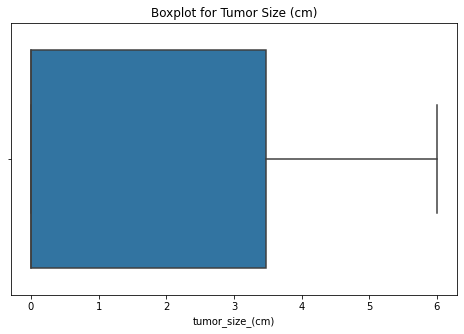

In [66]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=oral_cancer_df["tumor_size_(cm)"])
plt.title("Boxplot for Tumor Size (cm)")
plt.show()


In [67]:
print(oral_cancer_df['age'].min())
print(oral_cancer_df['age'].max())

15
101


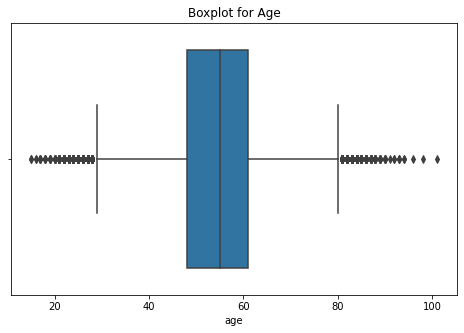

In [68]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=oral_cancer_df["age"])
plt.title("Boxplot for Age")
plt.show()

In [69]:
print(oral_cancer_df['cost_of_treatment_(usd)'].min())
print(oral_cancer_df['cost_of_treatment_(usd)'].max())

0.0
159988.0


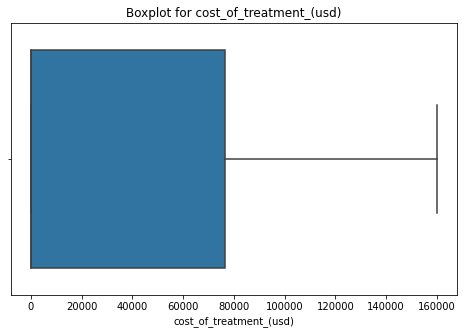

In [70]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=oral_cancer_df["cost_of_treatment_(usd)"])
plt.title("Boxplot for cost_of_treatment_(usd)")
plt.show()

### *How Do Early Diagnosis and Treatment Type Impact Survival Rates and Economic Burden Among Oral Cancer Patients?*

This research question aims to analyze how diagnosing oral cancer at an early stage, along with the chosen treatment approach, influences *survival rates* and *economic costs* for patients.

I should consider, early_diagnosis, survival_rate, economic burden, cost of treatment as major fields

In [71]:
# rename columns

oral_cancer_df = oral_cancer_df.rename(columns={
    'tumor_size_(cm)': 'tumor_size',
    'survival_rate_(5-year,_%)': 'survival_rate',
    'cost_of_treatment_(usd)': 'cost_of_treatment',
    'economic_burden_(lost_workdays_per_year)':'economic_burden',
    'oral_cancer_(diagnosis)': 'diagnosis'
})

# oral_cancer_df.head(2)

#### Summary Statistics

In [72]:

print("Summary Statistics:")
oral_cancer_statistics = oral_cancer_df[['survival_rate', 'cost_of_treatment', 'economic_burden']].describe()
print(oral_cancer_statistics)

Summary Statistics:
       survival_rate  cost_of_treatment  economic_burden
count   84922.000000       84922.000000     84922.000000
mean       79.503359       39109.881244        52.028391
std        26.483742       44710.687054        60.389796
min        10.000000           0.000000         0.000000
25%        65.230000           0.000000         0.000000
50%       100.000000           0.000000         0.000000
75%       100.000000       76468.437500       104.000000
max       100.000000      159988.000000       179.000000


` From the above statisitcs:`

- The mean survival rate is 79.5%, this indicates that most patients have a high chance of survival.

- On average, patients lose 52 workdays per year due to oral cancer.

- Some patients (25%) lose no workdays and incurred zero treatment costs, , possibly due to early diagnosis

##### - There is a Link Between Cancer Stage and Economic Impact such that:

- Patients with higher treatment costs also have more lost workdays.

- Those who are diagnosed early tend to have lower costs and minimal economic burden.

In [73]:
oral_cancer_df.columns

Index(['id', 'country', 'age', 'gender', 'tobacco_use', 'alcohol_consumption',
       'hpv_infection', 'betel_quid_use', 'chronic_sun_exposure',
       'poor_oral_hygiene', 'diet_(fruits_&_vegetables_intake)',
       'family_history_of_cancer', 'compromised_immune_system', 'oral_lesions',
       'unexplained_bleeding', 'difficulty_swallowing',
       'white_or_red_patches_in_mouth', 'tumor_size', 'cancer_stage',
       'treatment_type', 'survival_rate', 'cost_of_treatment',
       'economic_burden', 'early_diagnosis', 'diagnosis'],
      dtype='object')

#### Group-by Analysis

In [74]:
print("\nAverage Survival Rate by Diagnosis Stage:")
survival_rate = oral_cancer_df.groupby("cancer_stage")["survival_rate"].mean()

print(survival_rate)



Average Survival Rate by Diagnosis Stage:
cancer_stage
0    100.000000
1     84.984447
2     67.469977
3     39.957052
4     20.081187
Name: survival_rate, dtype: float64


In [75]:
print("\nTumor Size & Cost of Treatment by Treatment Type:")

oral_cancer_df.groupby('treatment_type')[['tumor_size','cost_of_treatment']].mean()


Tumor Size & Cost of Treatment by Treatment Type:


,tumor_size,cost_of_treatment
treatment_type,,
Chemotherapy,3.516545,78136.382225
No Treatment,0.577721,12979.836404
Radiation,3.487600,78589.447723
Surgery,3.510754,78365.255735
Targeted Therapy,3.513186,78616.147549


-  1. No Treatment is associated with significantly smaller tumors (0.58 cm) and lower costs (~$12,980).

This suggests that patients opting for no treatment likely have early-stage cancer.

- 2. Chemotherapy, Radiation, Surgery, and Targeted Therapy have similar tumor sizes (~3.5 cm).

This implies that these treatments are used at similar stages of cancer progression (likely moderate to advanced stages).

- 3. Radiation has the highest treatment cost (~$78,589), followed by Targeted Therapy ($78,616).

Radiation and Targeted Therapy tend to be more expensive, possibly due to longer treatment durations and advanced medical equipment required.

Chemotherapy and Surgery are slightly less costly but still expensive (~$78,100 to $78,400).



Frequency Distribution of the Cancer stages

In [76]:
print("\nFrequency of Cancer Stages:")
level_frequency = oral_cancer_df["cancer_stage"].value_counts()

print(level_frequency)



Frequency of Cancer Stages:
cancer_stage
0    42573
2    12865
1    12713
3    10520
4     6251
Name: count, dtype: int64


- A significant number of cases (Stage 0) are detected early, which aligns with the high median survival rate (100%) observed in the summary statistics.

#### Correlation Analysis

In [77]:
corr_df = oral_cancer_df[['survival_rate', 'cost_of_treatment', 'economic_burden', 'tumor_size']]
corr_matrix = corr_df.corr()
print("\nCorrelation Matrix:")
print(corr_matrix)



Correlation Matrix:
                   survival_rate  cost_of_treatment  economic_burden  \
survival_rate           1.000000          -0.806619        -0.671807   
cost_of_treatment      -0.806619           1.000000         0.759583   
economic_burden        -0.671807           0.759583         1.000000   
tumor_size             -0.669145           0.757527         0.746402   

                   tumor_size  
survival_rate       -0.669145  
cost_of_treatment    0.757527  
economic_burden      0.746402  
tumor_size           1.000000  


1. There is a Strong Negative Correlation Between Survival Rate & Cost of Treatment (-0.81)

As treatment costs increase, survival rates tend to decrease.

This suggests that late-stage cancer cases (which require expensive treatments like chemotherapy and surgery) have lower survival rates.


2. Strong Positive Correlation Between Cost of Treatment & Economic Burden (0.76)

Higher treatment costs contribute directly to a higher economic burden.

3. Tumor Size is Positively Correlated with Treatment Cost (0.76) and Economic Burden (0.75)

as Larger tumors are associated with more expensive treatments

### Data Visualization

Survival Rate Distribution

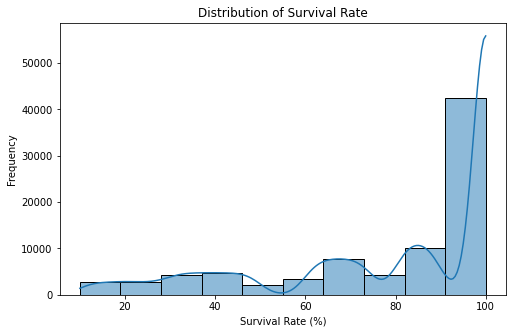

In [78]:
plt.figure(figsize=(8, 5))
sns.histplot(oral_cancer_df['survival_rate'], bins=10, kde=True)
plt.title('Distribution of Survival Rate')
plt.xlabel('Survival Rate (%)')
plt.ylabel('Frequency')
plt.show()

- Most patients have a survival rate above 60%, with a peak around 80-100%.

Survival Time by Cancer Diagnosis Stage

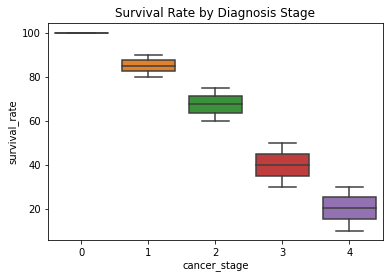

In [79]:

sns.boxplot(x="cancer_stage", y="survival_rate", data=oral_cancer_df)
plt.title("Survival Rate by Diagnosis Stage")
plt.show()

- This shows that form the data:
    the survival rates decrease with the cancer stages


Treatment Type Count

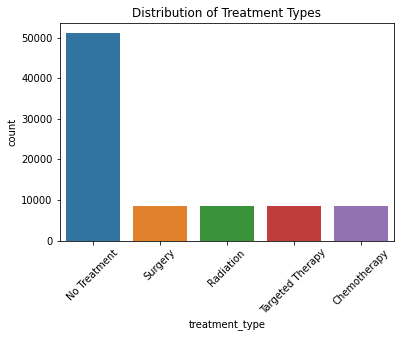

In [80]:
sns.countplot(x="treatment_type", data=oral_cancer_df)
plt.title("Distribution of Treatment Types")
plt.xticks(rotation=45)
plt.show()

- A significant number of the patients did not recive treatment, probably as a result of early diagnosis

Treatment_type by Survival_Rate

In [81]:
oral_cancer_df.groupby('treatment_type')['survival_rate'].mean()

treatment_type
Chemotherapy        58.676756
No Treatment        93.216537
Radiation           58.984658
Surgery             58.754765
Targeted Therapy    59.066848
Name: survival_rate, dtype: float64

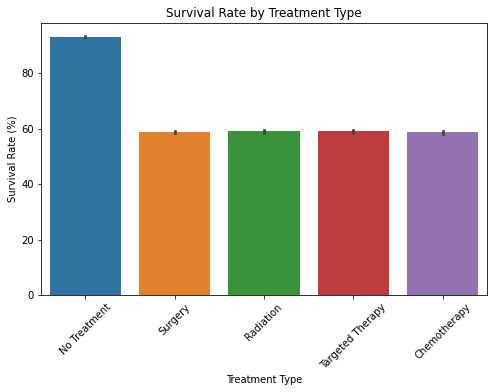

In [82]:
plt.figure(figsize=(8, 5))
sns.barplot(x=oral_cancer_df['treatment_type'], y=oral_cancer_df['survival_rate'])
plt.title('Survival Rate by Treatment Type')
plt.xlabel('Treatment Type')
plt.ylabel('Survival Rate (%)')
plt.xticks(rotation=45)
plt.show()

- Focusing on the patients who recieved treatment, Targeted Therapy shows a significantly small difference but  higher impact on survival rate

Heatmap

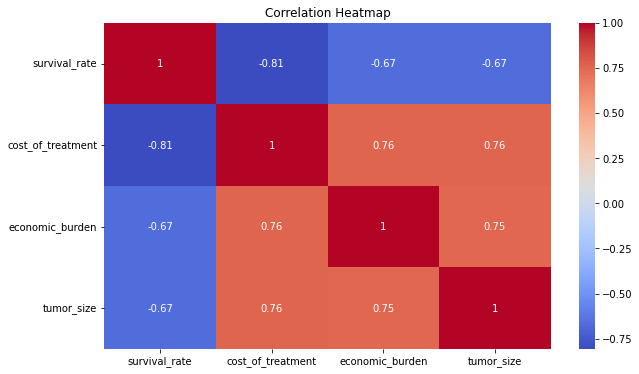

In [83]:

plt.figure(figsize=(10, 6))
corr = oral_cancer_df[['survival_rate', 'cost_of_treatment', 'economic_burden', 'tumor_size']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

- The Cost of treatment and economic burden are HIGHLY correlated

- Larger tumor sizes generally correlate with lower survival rates.


Economic Burden by Treatment Type

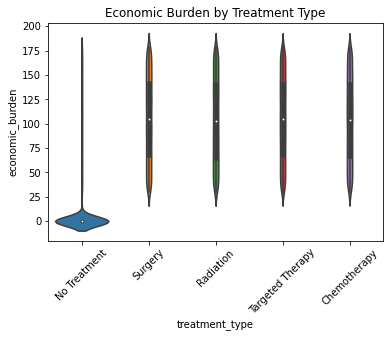

In [84]:

sns.violinplot(x="treatment_type", y="economic_burden", data=oral_cancer_df)
plt.title("Economic Burden by Treatment Type")
plt.xticks(rotation=45)
plt.show()


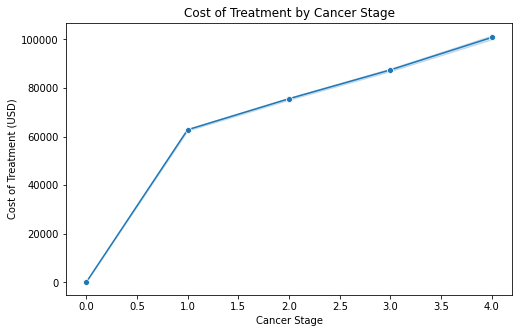

In [85]:
plt.figure(figsize=(8, 5))
sns.lineplot(x=oral_cancer_df['cancer_stage'], y=oral_cancer_df['cost_of_treatment'], marker='o')
plt.title('Cost of Treatment by Cancer Stage')
plt.xlabel('Cancer Stage')
plt.ylabel('Cost of Treatment (USD)')
plt.show()

- Higher cancer stages lead to significantly higher treatment costs.

In [86]:
oral_cancer_df.head()

,id,country,age,gender,tobacco_use,alcohol_consumption,hpv_infection,betel_quid_use,chronic_sun_exposure,poor_oral_hygiene,...,difficulty_swallowing,white_or_red_patches_in_mouth,tumor_size,cancer_stage,treatment_type,survival_rate,cost_of_treatment,economic_burden,early_diagnosis,diagnosis
0,1,Italy,36,Female,Yes,Yes,Yes,No,No,Yes,...,No,No,0.00,0,No Treatment,100.00,0.00,0,No,No
1,2,Japan,64,Male,Yes,Yes,Yes,No,Yes,Yes,...,No,No,1.78,1,No Treatment,83.34,77772.50,177,No,Yes
2,3,UK,37,Female,No,Yes,No,No,Yes,Yes,...,No,Yes,3.52,2,Surgery,63.22,101164.50,130,Yes,Yes
3,4,Sri Lanka,55,Male,Yes,Yes,No,Yes,No,Yes,...,No,No,0.00,0,No Treatment,100.00,0.00,0,Yes,No
4,5,South Africa,68,Male,No,No,No,No,No,Yes,...,No,No,2.83,3,No Treatment,44.29,45354.75,52,No,Yes


<!-- Logistic Regression -->

### Regression Models

-- Predict survival rates.

-- Random Forest, Linear Regression and Gradient Boosting

-- Diagnose oral cancer  survival rates based on tumor size, cancer stage, early diagnosis, treatment type, diagnosis, cost of treatment, economic burden

In [120]:
from sklearn.model_selection import train_test_split

# 1
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
# 2
from sklearn.linear_model import LinearRegression
# 3
from sklearn.ensemble import GradientBoostingRegressor


import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [129]:
# convert categorical variables to numerical values
label_encoder = LabelEncoder()
for col in ['treatment_type', 'early_diagnosis','diagnosis']:
    oral_cancer_df[col] = label_encoder.fit_transform(oral_cancer_df[col])

# defining the features and the target
features = ['tumor_size', 'cancer_stage', 'treatment_type', 'early_diagnosis','cost_of_treatment', 'economic_burden', 'diagnosis']
target = 'survival_rate'


# split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(oral_cancer_df[features], oral_cancer_df[target], test_size=0.2, random_state=42)



`1. Linear Regression`

In [130]:
# initialize and train the linear regresion model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)


# evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)


print(f"\nMean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")



Mean Squared Error: 12.96
R-squared: 0.98


Actual Vs Predicted Plot

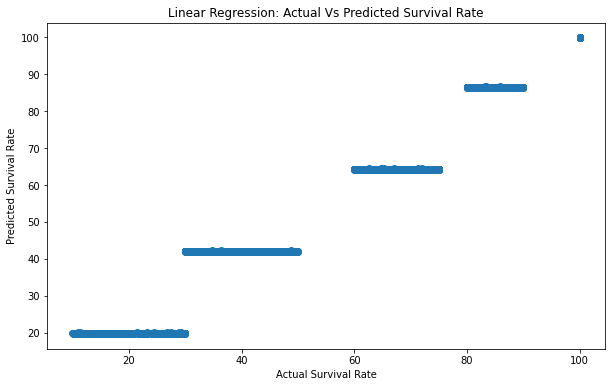

In [131]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Survival Rate")
plt.ylabel("Predicted Survival Rate")

plt.title("Linear Regression: Actual Vs Predicted Survival Rate")
plt.show()

`2. Random Forest Regression`

In [132]:
# initialize the random forest regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


# make prediction on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nMean Squared Error: {mse:.2f}")


print(f"R-squared: {r2:.2f}")


Mean Squared Error: 11.42
R-squared: 0.98


The MSE AND R2 show that the model is performing very well on the given data.

- An mse of 14.26 means that, on average the squared difference between the predicted and actual survival rates is 14.26. Based on my target variable scale - survival_rate(%), the lower MSE indicates better model accuracy


- An r2 of 0.98 indicates that 98% of the variance in the survival rates is explained by the model. This very high value suggests that the model captures almost all variability in the data. (possible overfiitting - thae model may be too closely tailorred to the training data and may not perform well on new independent set of data)

Feature Importance

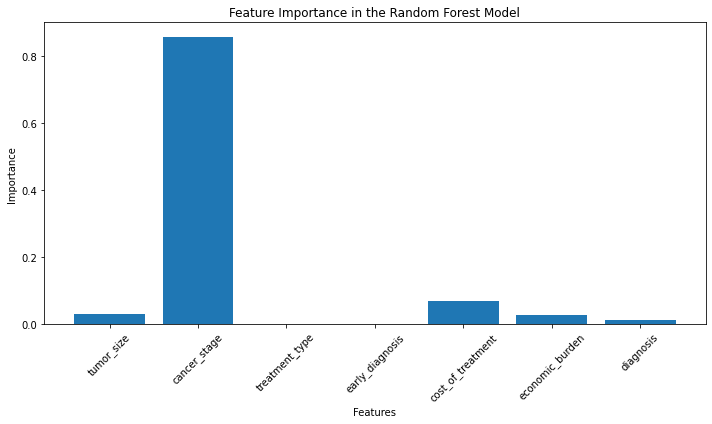

In [ ]:
feature_importance_rf = rf_model.feature_importances_

# plot the grapgh
plt.figure(figsize=(10,6))
plt.bar(features, feature_importance_rf)
plt.xlabel('Features')
plt.ylabel('Importance')

plt.title('Feature Importance in the Random Forest Model')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

`3. Gradient Boosting`

In [136]:
# initiliaze and train the Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

gbr_model.fit(X_train, y_train)

# make predictions for the model
y_pred = gbr_model.predict(X_test)

# evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"\nMean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Squared Error: 10.77
R-squared: 0.98


Feature Importance

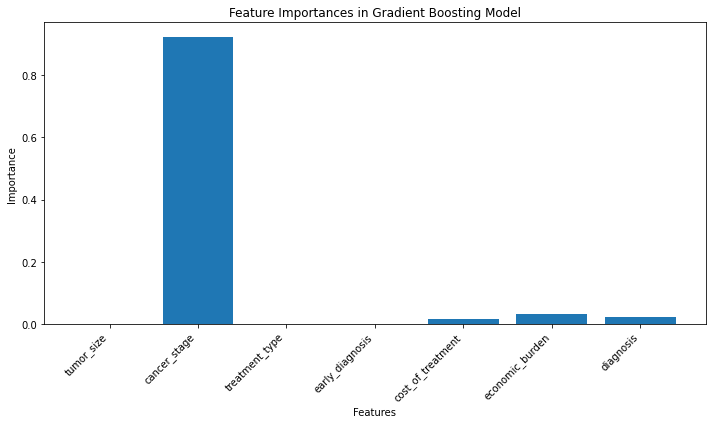

In [137]:
# features importance
feature_importance_gr = gbr_model.feature_importances_

plt.figure(figsize=(10,6))
plt.bar(features, feature_importance_gr)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances in Gradient Boosting Model')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Conclusion
Linear Regression, Random Forest Regression, and Gradient Boosting Regression—perform well, as evidenced by their high R-squared values of 0.98. This suggests that 98% of the variance in the target variable is explained by the predictors in each model. The Mean Squared Error (MSE) values, which measure the average squared differences between actual and predicted values, vary slightly across the models. Linear Regression has the highest MSE at 12.96, followed by Random Forest Regression at 11.42, while Gradient Boosting Regression has the lowest MSE at 10.77. A lower MSE indicates better predictive accuracy, as it suggests that the model’s predictions are closer to the actual values.

Gradient Boosting Regression is the best-performing model based on its lowest MSE, meaning it makes the most accurate predictions with minimal errors. While all models exhibit strong predictive power, Gradient Boosting’s iterative approach of correcting previous errors leads to improved performance over the others.Therefore, Gradient Boosting Regression is the recommended model for making predictions on this dataset.